In [1]:
#Ensemble des import utiles pour l'execution du notebook
import statsTuxML
import csv
from sklearn.neighbors import NearestNeighbors
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_extraction import DictVectorizer

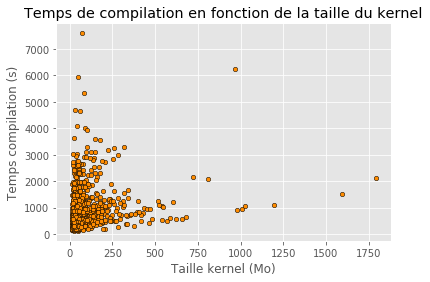

Coefficient de correlation : 0.18746486848943808


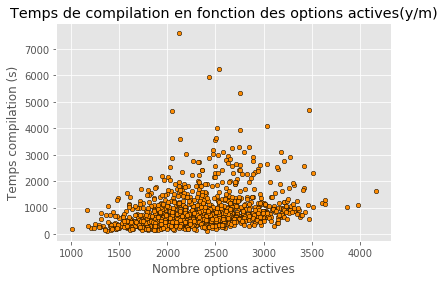

Coefficient de correlation : 0.3058180944818912


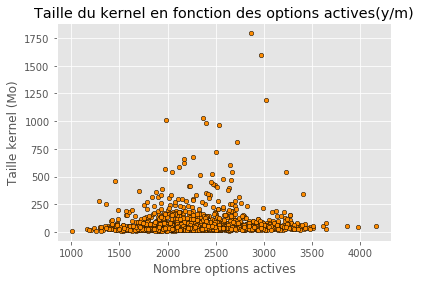

Coefficient de correlation : 0.060218082791867814


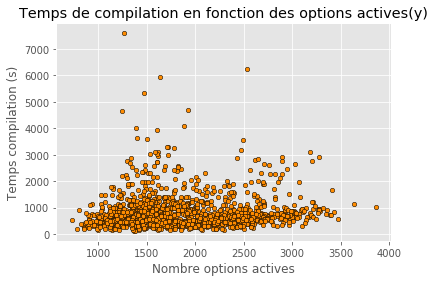

Coefficient de correlation : 0.055930573226354016


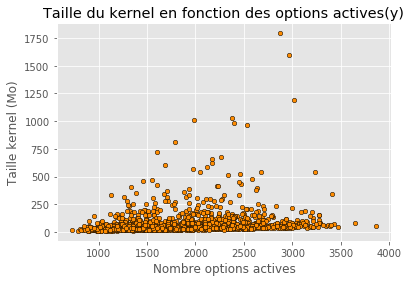

Coefficient de correlation : 0.19741523935977995


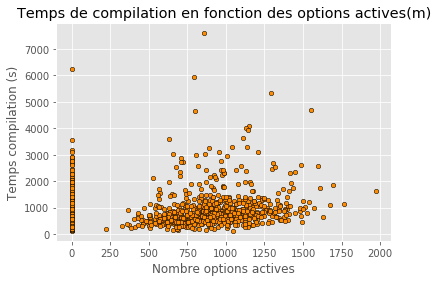

Coefficient de correlation : 0.21352795839926272


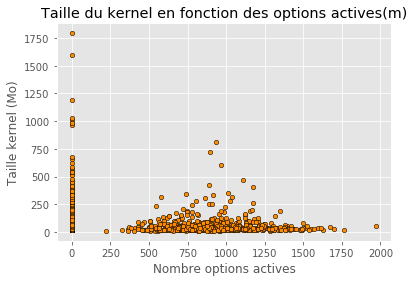

Coefficient de correlation : -0.17836159087303113


(1504,
 {'Max': 1972, 'Mean': 450.0472074468085, 'Min': 0, 'Total': 676871},
 {'Max': 3864, 'Mean': 1860.306515957447, 'Min': 724, 'Total': 2797901},
 {'Max': 4167, 'Mean': 2310.353723404255, 'Min': 1005, 'Total': 3474772},
 {'Max': 1792.972885131836,
  'Mean': 74.1764860812654,
  'Min': 10.527030944824219,
  'Total': 111561.43506622314},
 {'Max': 7588.32,
  'Mean': 813.6757500000003,
  'Min': 120.933,
  'Total': 1223768.3280000004})

In [2]:
statistiques = statsTuxML.stats("res.csv")
statistiques


In [5]:
#statsTuxML.stats("set3.csv")

In [22]:
#Extraction des données du CSV

dataBrut = [] #Toutes les infos sans temps de compilation et taille du kernel
info = [] #Temps de compilation et taille du kernel

with open("res.csv") as csvFile :
    reader = csv.DictReader(csvFile)
    for ligne in reader :
        size = int(ligne["KERNEL_SIZE"]) / (2**20)
        comp = float(ligne["COMPILE_TIME"])
        info.append([size,comp])
        tmp = {}
        for i in ligne :
            if i !="KERNEL_SIZE" and i !="COMPILE_TIME" and i != "":
                tmp[i] = ligne[i]
        dataBrut.append(tmp)


In [23]:
#Preprocessing des data
v = DictVectorizer(sparse=False)
dataPreProcess = v.fit_transform(dataBrut)
v.get_feature_names()


['CONFIG_104_QUAD_8=m',
 'CONFIG_104_QUAD_8=n',
 'CONFIG_104_QUAD_8=y',
 'CONFIG_60XX_WDT=m',
 'CONFIG_60XX_WDT=n',
 'CONFIG_60XX_WDT=y',
 'CONFIG_64BIT=y',
 'CONFIG_6LOWPAN=m',
 'CONFIG_6LOWPAN=n',
 'CONFIG_6LOWPAN=y',
 'CONFIG_6LOWPAN_DEBUGFS=n',
 'CONFIG_6LOWPAN_DEBUGFS=y',
 'CONFIG_6LOWPAN_GHC_EXT_HDR_DEST=m',
 'CONFIG_6LOWPAN_GHC_EXT_HDR_DEST=n',
 'CONFIG_6LOWPAN_GHC_EXT_HDR_DEST=y',
 'CONFIG_6LOWPAN_GHC_EXT_HDR_FRAG=m',
 'CONFIG_6LOWPAN_GHC_EXT_HDR_FRAG=n',
 'CONFIG_6LOWPAN_GHC_EXT_HDR_FRAG=y',
 'CONFIG_6LOWPAN_GHC_EXT_HDR_HOP=m',
 'CONFIG_6LOWPAN_GHC_EXT_HDR_HOP=n',
 'CONFIG_6LOWPAN_GHC_EXT_HDR_HOP=y',
 'CONFIG_6LOWPAN_GHC_EXT_HDR_ROUTE=m',
 'CONFIG_6LOWPAN_GHC_EXT_HDR_ROUTE=n',
 'CONFIG_6LOWPAN_GHC_EXT_HDR_ROUTE=y',
 'CONFIG_6LOWPAN_GHC_ICMPV6=m',
 'CONFIG_6LOWPAN_GHC_ICMPV6=n',
 'CONFIG_6LOWPAN_GHC_ICMPV6=y',
 'CONFIG_6LOWPAN_GHC_UDP=m',
 'CONFIG_6LOWPAN_GHC_UDP=n',
 'CONFIG_6LOWPAN_GHC_UDP=y',
 'CONFIG_6LOWPAN_NHC=m',
 'CONFIG_6LOWPAN_NHC=n',
 'CONFIG_6LOWPAN_NHC=y',
 'CONFIG

In [14]:
#Separation du training set et du testing set
data_train, data_test, info_train, info_test = train_test_split(dataPreProcess, info, test_size=0.2, random_state=0)

In [18]:
# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=10)
regr_2 = DecisionTreeRegressor() #Pas de profondeur max
regr_1.fit(data_train, info_train)
regr_2.fit(data_train, info_train)

# Predict
info_predict_1 = regr_1.predict(data_test)
info_predict_2 = regr_2.predict(data_test)